In [1]:
from google.colab import files
uploaded = files.upload()


Saving sql_output_for_ml.csv to sql_output_for_ml.csv


In [2]:
import pandas as pd

df = pd.read_csv("sql_output_for_ml.csv")
df.head()


,Customer ID,Churn
0,7590-VHVEG,No
1,5575-GNVDE,No
2,3668-QPYBK,Yes
3,7795-CFOCW,No
4,9237-HQITU,Yes


In [3]:
# Optional: Check if any nulls
print(df.isnull().sum())

# If 'Churn' is categorical (like 'Yes'/'No'), convert it
if df['Churn'].dtype == 'object':
    df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


Customer ID    0
Churn          0
dtype: int64


In [4]:
df = pd.get_dummies(df, drop_first=True)


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Churn', axis=1)  # 'Churn' is the target
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[1036    0]
 [ 373    0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1036
           1       0.00      0.00      0.00       373

    accuracy                           0.74      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.74      0.62      1409



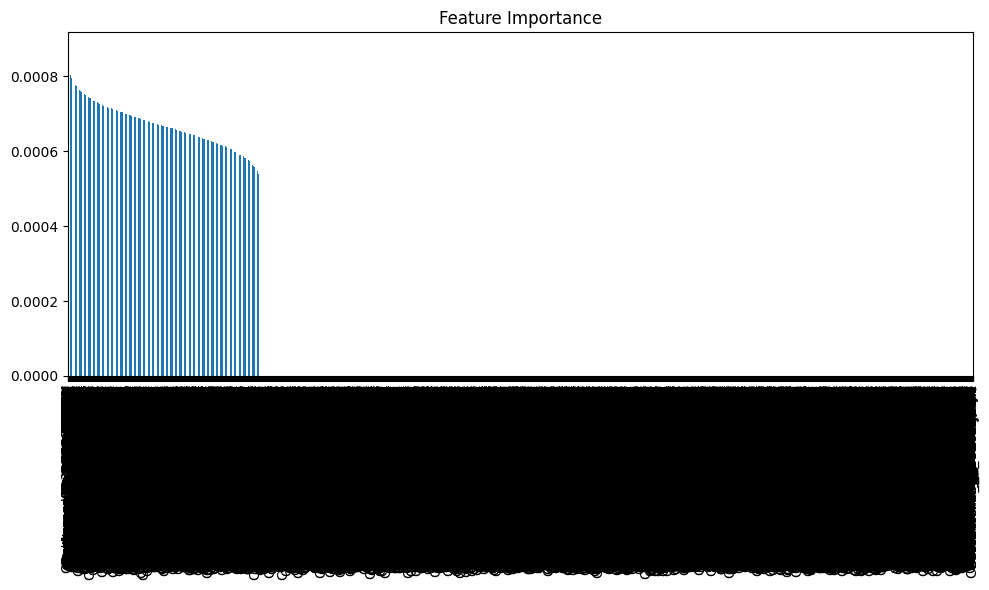

In [7]:
import matplotlib.pyplot as plt

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10,6))
feature_imp.plot(kind='bar')
plt.title("Feature Importance")
plt.tight_layout()
plt.show()
